### Try new partial cooling sequence with cooling at Z direction first

In [1]:
import cu_rsc as cr
cr.setup_tables()
import RSC_sim
import numpy as np
import cupy as cp
import cupyx
import matplotlib.pyplot as plt
from tqdm import tqdm
M_dev = cr.load_m_table_device()        # upload to GPU
res   = cr.resources_from_config(M_dev)

c:\Users\LyuQi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
seq_partial = np.load("seq_partial.npy")

In [3]:
np.unique(np.load("gen_45.npy"), axis=0)

array([[ 0.00000000e+00, -3.00000000e+00,  1.76594483e+04,
         8.36717035e-05],
       [ 0.00000000e+00, -2.00000000e+00,  8.60968532e+03,
         1.17046293e-04],
       [ 0.00000000e+00, -1.00000000e+00,  1.36588502e+03,
         2.35755490e-05],
       [ 1.00000000e+00, -3.00000000e+00,  8.27053582e+03,
         1.40830368e-04],
       [ 1.00000000e+00, -2.00000000e+00,  1.22960834e+04,
         1.35644088e-04],
       [ 1.00000000e+00, -1.00000000e+00,  1.24925508e+03,
         2.03690554e-05],
       [ 2.00000000e+00, -5.00000000e+00,  6.87600517e+03,
         7.48209039e-05],
       [ 2.00000000e+00, -4.00000000e+00,  6.87428574e+03,
         9.17299107e-05],
       [ 2.00000000e+00, -3.00000000e+00,  3.54061427e+03,
         2.00092550e-04],
       [ 2.00000000e+00, -2.00000000e+00,  3.54061427e+03,
         1.33420193e-04]])

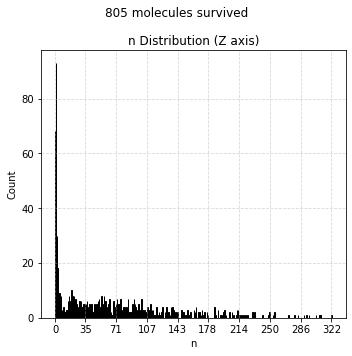

{'survival_rate_mean': array(0.805),
 'survival_rate_sem': array(0.00040034),
 'mot_mean': array([ 0.1826087 ,  0.40745342, 62.27701863]),
 'mot_sem': array([0.0009781 , 0.00328157, 0.07494771]),
 'ground_state_rate_mean': array(0.06497462),
 'ground_state_rate_sem': array(0.00025023),
 'N': array(1000),
 'B': array(1000)}

In [4]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_partial, res)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

### Axial-I

In [80]:
seq_new = np.empty((280, 4))
new_Z1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5]])
for i in range(100):
    seq_new[i] = new_Z1[i%4]

Raman pulses: 100%|██████████| 100/100 [00:12<00:00,  8.31it/s]


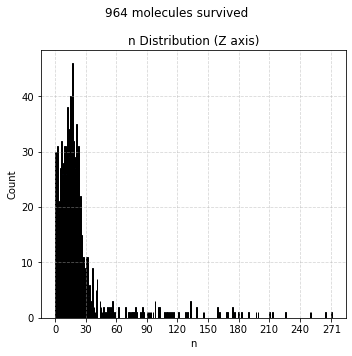

{'survival_rate_mean': array(0.964),
 'survival_rate_sem': array(0.00018951),
 'mot_mean': array([ 6.92634855,  8.32987552, 23.76037344]),
 'mot_sem': array([0.00790786, 0.0086674 , 0.03464678]),
 'ground_state_rate_mean': array(0.001001),
 'ground_state_rate_sem': array(3.26069192e-05),
 'N': array(1000),
 'B': array(1000)}

In [81]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_new[:100], res, show_progress=True)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

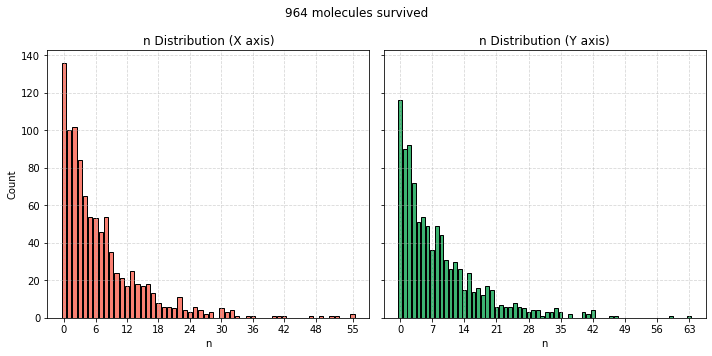

In [82]:
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(True, True, False))

### Axial-II

In [89]:
seq_new = np.empty((280, 4))
new_Z1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5]])
for i in range(100):
    seq_new[i] = new_Z1[i%4]
new_Z2 = np.array([[2, -6, 6e3, 5e-5],
                   [2, -5, 6e3, 5e-5],
                   [2, -4, 4e3, 7e-5],
                   [2, -3, 4e3, 7e-5]])
for i in np.arange(100, 200, 1):
    seq_new[i] = new_Z2[i%4]

Raman pulses: 100%|██████████| 200/200 [00:23<00:00,  8.51it/s]


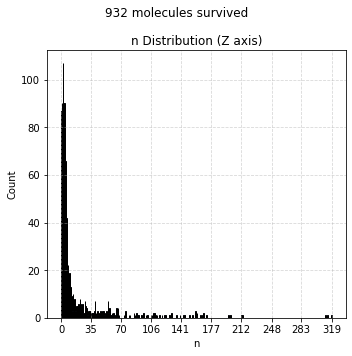

{'survival_rate_mean': array(0.932),
 'survival_rate_sem': array(0.00025209),
 'mot_mean': array([ 7.54184549,  8.66094421, 18.35085837]),
 'mot_sem': array([0.00817499, 0.00890615, 0.037253  ]),
 'ground_state_rate_mean': array(0.00100503),
 'ground_state_rate_sem': array(3.10781454e-05),
 'N': array(1000),
 'B': array(1000)}

In [90]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_new[:200], res, show_progress=True)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

### Axial-III

In [ ]:
seq_new = np.empty((300, 4))
new_Z1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5]])
for i in range(100):
    seq_new[i] = new_Z1[i%4]
new_Z2 = np.array([[2, -6, 6e3, 5e-5],
                   [2, -5, 6e3, 5e-5],
                   [2, -4, 4e3, 7e-5],
                   [2, -3, 4e3, 7e-5]])
for i in np.arange(100, 200, 1):
    seq_new[i] = new_Z2[i%4]
new_Z3 = np.array([[2, -2, 3e3, 9e-5],
                   [2, -1, 3e3, 9e-5]])
for i in np.arange(200, 300, 1):
    seq_new[i] = new_Z3[i%2]

Raman pulses: 100%|██████████| 300/300 [00:37<00:00,  7.91it/s]


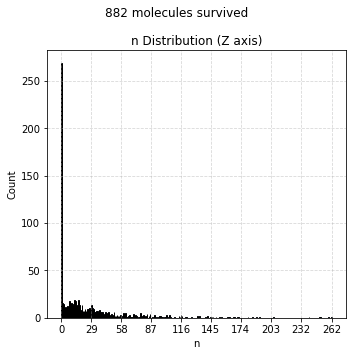

{'survival_rate_mean': array(0.882),
 'survival_rate_sem': array(0.00032474),
 'mot_mean': array([ 8.44444444, 10.1553288 , 26.71655329]),
 'mot_sem': array([0.0093174 , 0.01062765, 0.04076182]),
 'ground_state_rate_mean': array(0.00201207),
 'ground_state_rate_sem': array(4.25414423e-05),
 'N': array(1000),
 'B': array(1000)}

In [114]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_new, res, show_progress=True)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

### XYZ1

In [135]:
seq_new = np.empty((380, 4))
new_Z1 = np.array([[2, -10, 12e3, 3e-5],
                   [2, -9, 12e3, 3e-5],
                   [2, -8, 9e3, 3e-5],
                   [2, -7, 9e3, 3e-5]])
for i in range(100):
    seq_new[i] = new_Z1[i%4]
new_Z2 = np.array([[2, -6, 6e3, 5e-5],
                   [2, -5, 6e3, 5e-5],
                   [2, -4, 4e3, 7e-5],
                   [2, -3, 4e3, 7e-5]])
for i in np.arange(100, 200, 1):
    seq_new[i] = new_Z2[i%4]
new_Z3 = np.array([[2, -2, 3e3, 9e-5],
                   [2, -1, 3e3, 9e-5]])
for i in np.arange(200, 300, 1):
    seq_new[i] = new_Z3[i%2]
new_XYZ1 = np.array([[0, -2, 8e3, 12e-5],
                     [1, -2, 8e3, 12e-5],
                    [2, -10, 12e3, 3e-5],
                    [2, -9, 12e3, 3e-5],
                    [2, -8, 9e3, 3e-5],
                    [2, -7, 9e3, 3e-5],
                    [2, -6, 6e3, 5e-5],
                   [2, -5, 6e3, 5e-5],])
for i in np.arange(300, 380, 1):
    seq_new[i] = new_XYZ1[i%8]

Raman pulses: 100%|██████████| 380/380 [00:46<00:00,  8.13it/s]


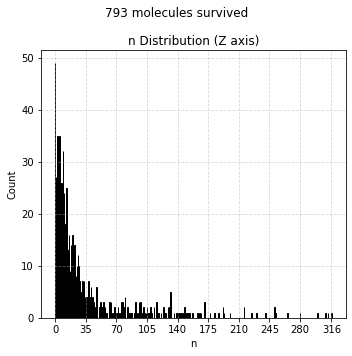

{'survival_rate_mean': array(0.793),
 'survival_rate_sem': array(0.00041081),
 'mot_mean': array([ 4.66078184,  6.94199243, 32.79823455]),
 'mot_sem': array([0.01014291, 0.01325392, 0.0581956 ]),
 'ground_state_rate_mean': array(0.0102459),
 'ground_state_rate_sem': array(0.00010024),
 'N': array(1000),
 'B': array(1000)}

In [136]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
cr.raman_cool_with_pumping(mol_0, seq_new, res, show_progress=True)
dist = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_0)
result

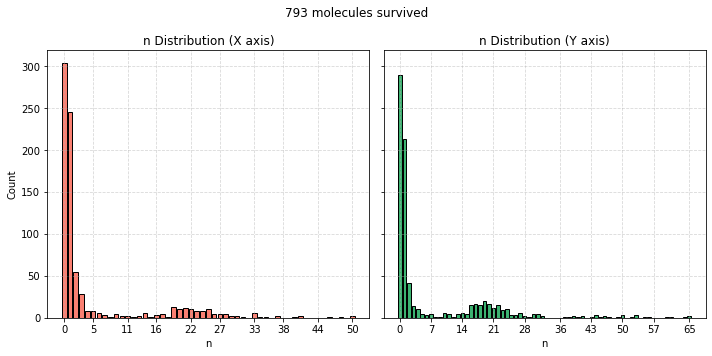

In [137]:
dist_ref = cr.get_n_distribution_gpu(mol_0, max_bins=10, plot=(True, True, False))

### XYZ2

#### No cooling

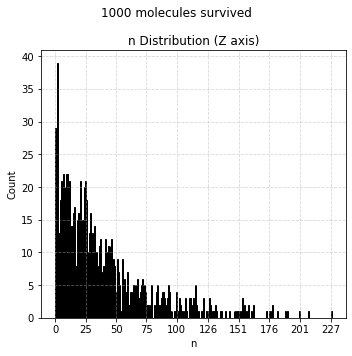

{'survival_rate_mean': array(1.),
 'survival_rate_sem': array(0.),
 'mot_mean': array([ 6.126,  7.28 , 38.425]),
 'mot_sem': array([0.00700833, 0.00828604, 0.03792454]),
 'ground_state_rate_mean': array(0.001),
 'ground_state_rate_sem': array(3.07318149e-05),
 'N': array(1000),
 'B': array(1000)}

In [36]:
temp = [25e-6, 25e-6, 25e-6]
mol_ref = cr.build_thermal_molecules(1000, temp, detuning_sigma=0)
dist = cr.get_n_distribution_gpu(mol_ref, max_bins=10, plot=(False, False, True))
result = cr.bootstrap_stats_from_molecules(mol_ref)
result

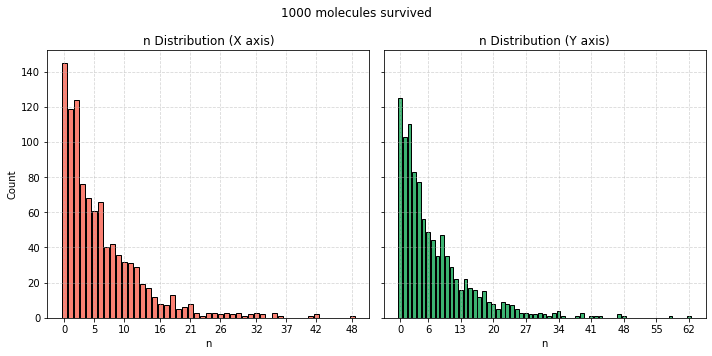

In [38]:
dist_ref = cr.get_n_distribution_gpu(mol_ref, max_bins=10, plot=(True, True, False))


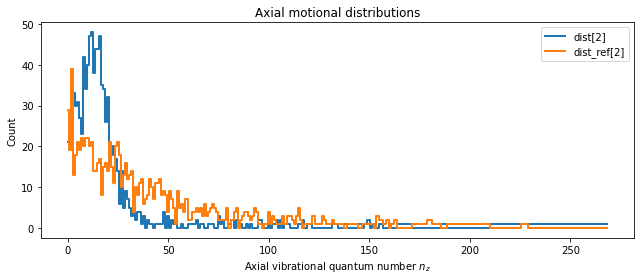

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def dict_to_aligned_arrays(d1, d2):
    # union of all n values
    n_vals = np.array(sorted(set(d1.keys()) | set(d2.keys())), dtype=int)
    c1 = np.array([d1.get(n, 0) for n in n_vals], dtype=float)
    c2 = np.array([d2.get(n, 0) for n in n_vals], dtype=float)
    return n_vals, c1, c2

# your inputs
d = dist[2]
dref = dist_ref[2]

n, c, cref = dict_to_aligned_arrays(d, dref)

plt.figure(figsize=(9, 4))
plt.step(n, c, where="mid", linewidth=2, label="dist[2]")
plt.step(n, cref, where="mid", linewidth=2, label="dist_ref[2]")
plt.xlabel("Axial vibrational quantum number $n_z$")
plt.ylabel("Count")
plt.title("Axial motional distributions")
plt.legend()
plt.tight_layout()
plt.show()